# Part 1: Data Processing and Feature Engineering (Day 1)
 1. Data Cleaning- Load the dataset using Pandas.-
 2.  Handle missing values in oil prices by filling gaps with interpolation.-
 3.   Convert date columns to proper datetime formats.-
 4.   Merge data from stores.csv, oil.csv, and holidays_events.csv into the main dataset

In [4]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
stores_df = pd.read_csv("stores.csv")
oil_df = pd.read_csv("oil.csv")
holidays_df = pd.read_csv("holidays_events.csv")




C:\Users\shaik\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# Display first few rows
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
holidays_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


# Step 2: Handling Missing Values
 Oil Prices: Missing values can be filled using interpolation.

 Sales Data: If there are missing values, decide whether to fill them with median values or drop them.

In [7]:

# Check missing values in all datasets
print(train_df.isnull().sum())
print(oil_df.isnull().sum())
print(stores_df.isnull().sum())
print(holidays_df.isnull().sum())


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [8]:
# Fill missing oil prices with interpolation
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].interpolate()

# Step 3: Convert Dates to Datetime Format
 Convert date columns in all datasets for easy manipulation.

In [9]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date'])


# Step 4: Merge Datasets

 Merge stores.csv (store metadata), oil.csv (economic impact), and holidays_events.csv (special events) with train_df and test_df.



In [10]:
# Merge store metadata
train_df = train_df.merge(stores_df, on='store_nbr', how='left')

# Merge oil prices
train_df = train_df.merge(oil_df, on='date', how='left')

# Merge holiday data
train_df = train_df.merge(holidays_df, on='date', how='left')

# Repeat merging for test set
test_df = test_df.merge(stores_df, on='store_nbr', how='left')
test_df = test_df.merge(oil_df, on='date', how='left')
test_df = test_df.merge(holidays_df, on='date', how='left')


In [11]:
# Extract time-based features
train_df['day'] = train_df['date'].dt.day
train_df['week'] = train_df['date'].dt.isocalendar().week
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year
train_df['day_of_week'] = train_df['date'].dt.weekday  # 0 = Monday, 6 = Sunday

# Identify seasonal trends (e.g., December sales)
train_df['is_december'] = (train_df['month'] == 12).astype(int)

# Repeat for test data
test_df['day'] = test_df['date'].dt.day
test_df['week'] = test_df['date'].dt.isocalendar().week
test_df['month'] = test_df['date'].dt.month
test_df['year'] = test_df['date'].dt.year
test_df['day_of_week'] = test_df['date'].dt.weekday
test_df['is_december'] = (test_df['month'] == 12).astype(int)


In [12]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,locale,locale_name,description,transferred,day,week,month,year,day_of_week,is_december
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1,0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1,0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1,0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1,0


In [13]:
test_df.head()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,...,locale,locale_name,description,transferred,day,week,month,year,day_of_week,is_december
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,...,NaN,NaN,NaN,NaN,16,33,8,2017,2,0
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,...,NaN,NaN,NaN,NaN,16,33,8,2017,2,0
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,...,NaN,NaN,NaN,NaN,16,33,8,2017,2,0
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,...,NaN,NaN,NaN,NaN,16,33,8,2017,2,0
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,...,NaN,NaN,NaN,NaN,16,33,8,2017,2,0


# 2. Event-Based Features
a. Holiday and Promotion Flags
Create binary indicators for events like holidays, promotions, and special economic events.

In [14]:
# Create binary flags for holidays and promotions
train_df['is_promotion'] = train_df['onpromotion'].notnull().astype(int)
test_df['is_promotion'] = test_df['onpromotion'].notnull().astype(int)


# To create a "holiday" column in the main dataset (train_df or test_df), you can use the type column from holidays_df. Typically, you should consider the following types as holidays:

"Holiday" (Public holidays)

"Additional" (Extended holiday periods)

"Bridge" (Holidays that connect weekends)

In [15]:
# Create a binary holiday flag (1 if it's a holiday, 0 otherwise)
holidays_df['is_holiday'] = holidays_df['type'].isin(['Holiday', 'Additional', 'Bridge']).astype(int)

# Merge this with train_df and test_df
train_df = train_df.merge(holidays_df[['date', 'is_holiday']], on='date', how='left')
test_df = test_df.merge(holidays_df[['date', 'is_holiday']], on='date', how='left')

# Fill missing values with 0 (non-holiday)
train_df['is_holiday'].fillna(0, inplace=True)
test_df['is_holiday'].fillna(0, inplace=True)


C:\Users\shaik\AppData\Local\Temp\ipykernel_9076\3402771355.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['is_holiday'].fillna(0, inplace=True)
C:\Users\shaik\AppData\Local\Temp\ipykernel_9076\3402771355.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

# b. Government Paydays (15th & Last Day of the Month)


In [16]:
# Identify government paydays (15th & last day of the month)
train_df['is_payday'] = train_df['day'].apply(lambda x: 1 if x == 15 else 0)
train_df['is_last_day'] = (train_df['day'] == train_df['date'].dt.days_in_month).astype(int)

test_df['is_payday'] = test_df['day'].apply(lambda x: 1 if x == 15 else 0)
test_df['is_last_day'] = (test_df['day'] == test_df['date'].dt.days_in_month).astype(int)


In [17]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,day,week,month,year,day_of_week,is_december,is_promotion,is_holiday,is_payday,is_last_day
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,1,1,1,2013,1,0,1,1.0,0,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,1,1,1,2013,1,0,1,1.0,0,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,1,1,1,2013,1,0,1,1.0,0,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,1,1,1,2013,1,0,1,1.0,0,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,1,1,1,2013,1,0,1,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186211,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,15,33,8,2017,1,0,1,1.0,1,0
3186212,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,15,33,8,2017,1,0,1,1.0,1,0
3186213,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,15,33,8,2017,1,0,1,1.0,1,0
3186214,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,15,33,8,2017,1,0,1,1.0,1,0


In [18]:
test_df

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,...,day,week,month,year,day_of_week,is_december,is_promotion,is_holiday,is_payday,is_last_day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,...,16,33,8,2017,2,0,1,0.0,0,0
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,...,16,33,8,2017,2,0,1,0.0,0,0
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,...,16,33,8,2017,2,0,1,0.0,0,0
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,...,16,33,8,2017,2,0,1,0.0,0,0
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,...,16,33,8,2017,2,0,1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6,47.26,...,31,35,8,2017,3,0,1,0.0,0,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6,47.26,...,31,35,8,2017,3,0,1,0.0,0,1
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6,47.26,...,31,35,8,2017,3,0,1,0.0,0,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,47.26,...,31,35,8,2017,3,0,1,0.0,0,1


# Earthquake Impact (April 16, 2016)
The earthquake likely had a significant effect on sales. We can flag this event .

In [19]:
# Earthquake impact feature (April 16, 2016)
train_df['earthquake_impact'] = (train_df['date'] >= '2016-04-16') & (train_df['date'] <= '2016-05-16')
train_df['earthquake_impact'] = train_df['earthquake_impact'].astype(int)

test_df['earthquake_impact'] = (test_df['date'] >= '2016-04-16') & (test_df['date'] <= '2016-05-16')
test_df['earthquake_impact'] = test_df['earthquake_impact'].astype(int)


In [20]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,week,month,year,day_of_week,is_december,is_promotion,is_holiday,is_payday,is_last_day,earthquake_impact
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,1,1,2013,1,0,1,1.0,0,0,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,1,1,2013,1,0,1,1.0,0,0,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,1,1,2013,1,0,1,1.0,0,0,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,1,1,2013,1,0,1,1.0,0,0,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,1,1,2013,1,0,1,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186211,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,33,8,2017,1,0,1,1.0,1,0,0
3186212,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,33,8,2017,1,0,1,1.0,1,0,0
3186213,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,33,8,2017,1,0,1,1.0,1,0,0
3186214,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,33,8,2017,1,0,1,1.0,1,0,0


In [21]:
test_df

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,...,week,month,year,day_of_week,is_december,is_promotion,is_holiday,is_payday,is_last_day,earthquake_impact
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,...,33,8,2017,2,0,1,0.0,0,0,0
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,...,33,8,2017,2,0,1,0.0,0,0,0
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,...,33,8,2017,2,0,1,0.0,0,0,0
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,...,33,8,2017,2,0,1,0.0,0,0,0
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,...,33,8,2017,2,0,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6,47.26,...,35,8,2017,3,0,1,0.0,0,1,0
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6,47.26,...,35,8,2017,3,0,1,0.0,0,1,0
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6,47.26,...,35,8,2017,3,0,1,0.0,0,1,0
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,47.26,...,35,8,2017,3,0,1,0.0,0,1,0


# Rolling Statistics
To capture trends over time, compute moving averages and standard deviations.

In [22]:
# Compute moving averages and rolling standard deviations
train_df['sales_7d_avg'] = train_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(7, min_periods=1).mean())
train_df['sales_7d_std'] = train_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(7, min_periods=1).std())

train_df['sales_30d_avg'] = train_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(30, min_periods=1).mean())
train_df['sales_30d_std'] = train_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(30, min_periods=1).std())

# Repeat for test data 
test_df['sales_7d_avg'] = train_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(7, min_periods=1).mean())
test_df['sales_7d_std'] = train_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(7, min_periods=1).std())

test_df['sales_30d_avg'] = train_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(30, min_periods=1).mean())
test_df['sales_30d_std'] = train_df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(30, min_periods=1).std())


# Lagged Features
Using sales from the previous week/month as predictive signals.

In [23]:
# Lagged features (previous week, previous month sales)
train_df['sales_lag_7'] = train_df.groupby(['store_nbr', 'family'])['sales'].shift(7)
train_df['sales_lag_30'] = train_df.groupby(['store_nbr', 'family'])['sales'].shift(30)

test_df['sales_lag_7'] = train_df.groupby(['store_nbr', 'family'])['sales'].shift(7)
test_df['sales_lag_30'] = train_df.groupby(['store_nbr', 'family'])['sales'].shift(30)


# Store-Specific Aggregations
Different stores might have different sales trends. 

In [24]:
# Average sales per store type
store_avg_sales = train_df.groupby('store_nbr')['sales'].mean().reset_index()
store_avg_sales.rename(columns={'sales': 'avg_sales_per_store'}, inplace=True)
train_df = train_df.merge(store_avg_sales, on='store_nbr', how='left')
test_df = test_df.merge(store_avg_sales, on='store_nbr', how='left')

# Top-selling product families per store cluster
top_families = train_df.groupby(['cluster', 'family'])['sales'].mean().reset_index()
top_families = top_families.sort_values(['cluster', 'sales'], ascending=[True, False])
top_families['top_family'] = top_families.groupby('cluster')['family'].transform(lambda x: x == x.iloc[0])

# Merge top family flag with main data
train_df = train_df.merge(top_families[['cluster', 'family', 'top_family']], on=['cluster', 'family'], how='left')
test_df = test_df.merge(top_families[['cluster', 'family', 'top_family']], on=['cluster', 'family'], how='left')

# Convert boolean to integer
train_df['top_family'] = train_df['top_family'].astype(int)
test_df['top_family'] = test_df['top_family'].astype(int)


In [25]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,is_last_day,earthquake_impact,sales_7d_avg,sales_7d_std,sales_30d_avg,sales_30d_std,sales_lag_7,sales_lag_30,avg_sales_per_store,top_family
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,...,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,254.632331,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,...,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,254.632331,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,...,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,254.632331,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,...,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,254.632331,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,...,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,254.632331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186211,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,...,0,0,381.083426,86.433346,424.092999,99.295090,358.132,571.333,479.081522,0
3186212,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,...,0,0,121.605856,16.673439,105.643566,32.343459,112.954,125.960,479.081522,0
3186213,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,...,0,0,1525.855714,439.927872,1606.464100,417.887986,2299.715,2041.967,479.081522,0
3186214,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,...,0,0,144.571429,38.504793,81.733333,77.316159,170.000,0.000,479.081522,0


In [26]:
test_df

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,...,is_last_day,earthquake_impact,sales_7d_avg,sales_7d_std,sales_30d_avg,sales_30d_std,sales_lag_7,sales_lag_30,avg_sales_per_store,top_family
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,...,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,254.632331,0
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,...,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,254.632331,0
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,...,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,254.632331,0
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,...,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,254.632331,0
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,...,0,0,0.000000,NaN,0.000000,NaN,NaN,NaN,254.632331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6,47.26,...,1,0,359.789283,101.683875,390.750123,158.006383,317.421,NaN,479.081522,0
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6,47.26,...,1,0,57.428571,17.905838,53.437500,25.570735,24.000,NaN,479.081522,0
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6,47.26,...,1,0,0.000000,0.000000,0.000000,0.000000,0.000,NaN,479.081522,0
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,47.26,...,1,0,0.000000,0.000000,0.000000,0.000000,0.000,NaN,479.081522,0


 # 3. Exploratory Data Analysis (EDA)
 - Visualize sales trends over time
.- Analyze sales before and after holidays and promotions.
 - Check correlations between oil prices and sales trends.
 - Identify anomalies in the data

## Visualizing Sales Trends Over Time
Plot daily and monthly sales trends to check seasonality.

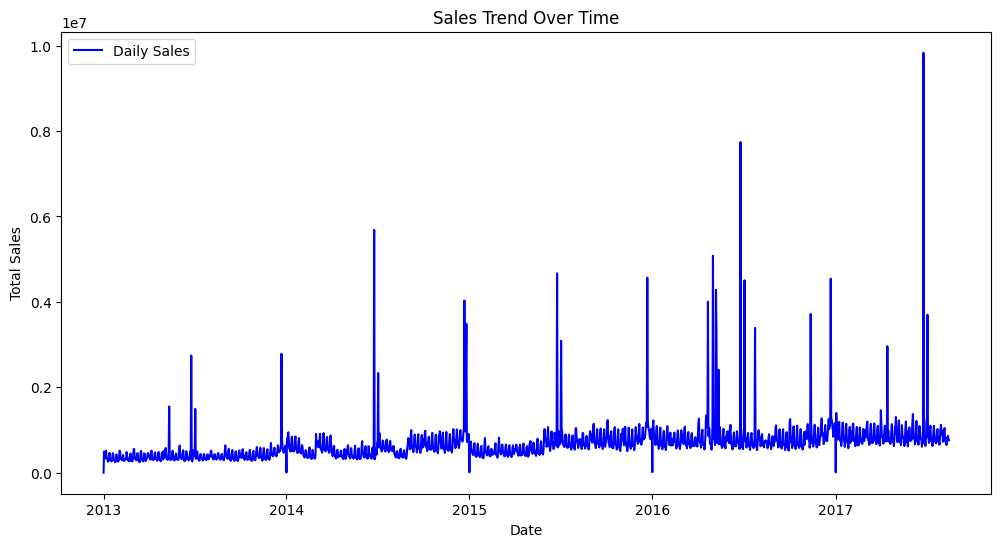

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sales by date
sales_trend = train_df.groupby('date')['sales'].sum().reset_index()

# Plot sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['date'], sales_trend['sales'], label="Daily Sales", color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()


# Sales Before and After Holidays & Promotions
Analyze how sales behave before, during, and after holidays.

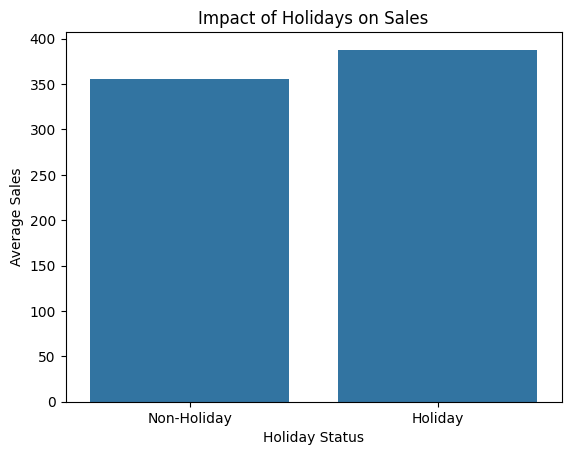

In [28]:
# Average sales on holidays vs. non-holidays
holiday_sales = train_df.groupby('is_holiday')['sales'].mean()
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.xlabel("Holiday Status")
plt.ylabel("Average Sales")
plt.title("Impact of Holidays on Sales")
plt.show()


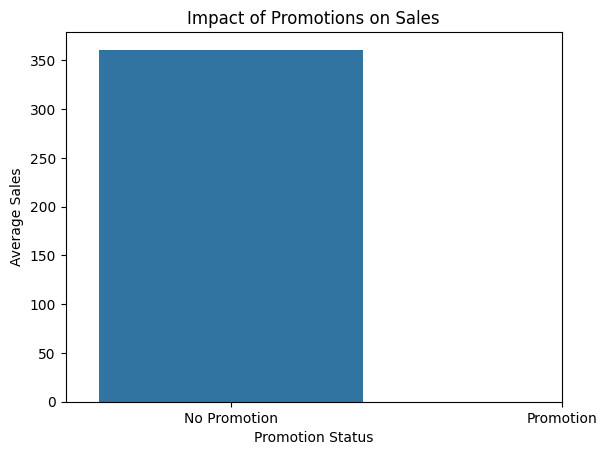

In [29]:
# Average sales with and without promotions
promotion_sales = train_df.groupby('is_promotion')['sales'].mean()
sns.barplot(x=promotion_sales.index, y=promotion_sales.values)
plt.xticks([0, 1], ['No Promotion', 'Promotion'])
plt.xlabel("Promotion Status")
plt.ylabel("Average Sales")
plt.title("Impact of Promotions on Sales")
plt.show()


# Correlation Between Oil Prices and Sales
Check how oil prices influence sales trends.

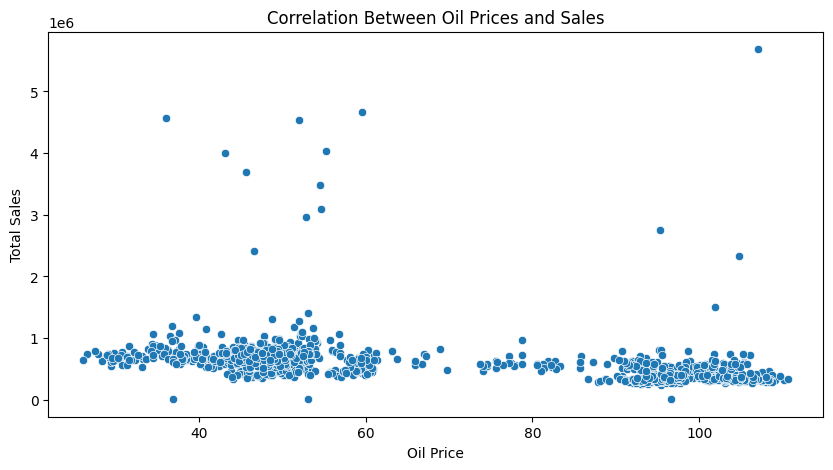

In [30]:
# Merge sales and oil price data
sales_oil = train_df.groupby('date')[['sales']].sum().merge(oil_df, on='date', how='left')

# Scatter plot: Oil price vs Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x=sales_oil['dcoilwtico'], y=sales_oil['sales'])
plt.xlabel('Oil Price')
plt.ylabel('Total Sales')
plt.title('Correlation Between Oil Prices and Sales')
plt.show()


In [31]:
#Compute correlation between sales and oil prices.
correlation = sales_oil[['sales', 'dcoilwtico']].corr()
print("Correlation Matrix:\n", correlation)


Correlation Matrix:
                sales  dcoilwtico
sales       1.000000   -0.357915
dcoilwtico -0.357915    1.000000


# Identifying Anomalies in Sales Data
Detect sales spikes/drops using box plots and To detect sharp changes rolling averages:

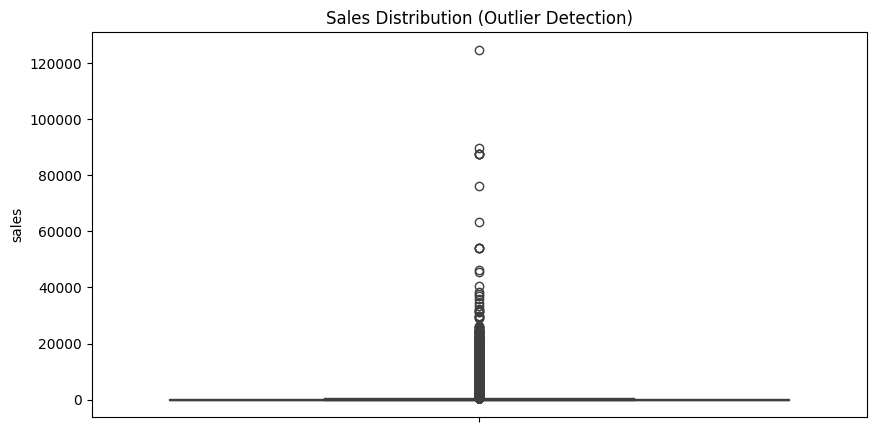

In [32]:
# Box plot for outlier detection
plt.figure(figsize=(10, 5))
sns.boxplot(y=train_df['sales'])
plt.title("Sales Distribution (Outlier Detection)")
plt.show()


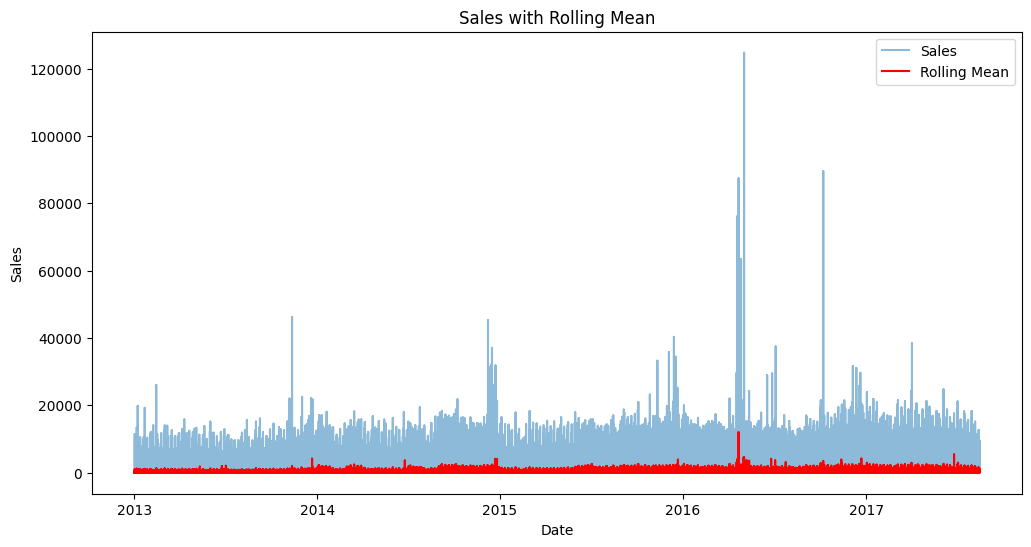

In [33]:
#
# Compute rolling mean and standard deviation
train_df['rolling_mean'] = train_df['sales'].rolling(window=30, min_periods=1).mean()
train_df['rolling_std'] = train_df['sales'].rolling(window=30, min_periods=1).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(train_df['date'], train_df['sales'], label="Sales", alpha=0.5)
plt.plot(train_df['date'], train_df['rolling_mean'], label="Rolling Mean", color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales with Rolling Mean')
plt.legend()
plt.show()


# Part 2: Model Selection, Forecasting, and Evaluation (Day 2)
### 1. Model Training
 Train at least five different time series forecasting models:
- Baseline Model (Naïve Forecasting) - Assume future sales = previous sales.
- ARIMA (AutoRegressive Integrated Moving Average) - A traditional time series model.
- Random Forest Regressor - Tree-based model to capture non-linear relationships.
- XGBoost or LightGBM - Gradient boosting models to improve accuracy.
- LSTM (Long Short-Term Memory Neural Network) - A deep learning-based forecasting model

##### 1. Baseline Model (Naïve Forecasting)
Assumes future sales are the same as previous sales.

In [34]:
# Naïve Forecast: Predict next 15 days as last available sales
naive_forecast = test_df.copy()
naive_forecast['sales'] = train_df.groupby('store_nbr')['sales'].transform('last')


#### 2. ARIMA (AutoRegressive Integrated Moving Average)
A classical time series model that captures trends and seasonality.

In [35]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA for one product-store combination
store_sample = train_df[train_df['store_nbr'] == 1]
arima_model = ARIMA(store_sample['sales'], order=(5,1,0))
arima_fit = arima_model.fit()
forecast = arima_fit.forecast(steps=15)


C:\Users\shaik\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shaik\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shaik\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shaik\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shaik\AppData\Roaming\Python\Python311\site-packages\statsmodel

#### 3. Random Forest Regressor
A tree-based model to capture non-linear relationships.


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Prepare training data
X_train = train_df[['day', 'month', 'year', 'is_holiday']]
y_train = train_df['sales']
X_test = test_df[['day', 'month', 'year', 'is_holiday']]

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_forecast = rf_model.predict(X_test)


In [52]:
rf_forecast_train = rf_model.predict(X_train)


In [40]:
test_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'city', 'state',
       'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale', 'locale_name',
       'description', 'transferred', 'day', 'week', 'month', 'year',
       'day_of_week', 'is_december', 'is_promotion', 'is_holiday', 'is_payday',
       'is_last_day', 'earthquake_impact', 'sales_7d_avg', 'sales_7d_std',
       'sales_30d_avg', 'sales_30d_std', 'sales_lag_7', 'sales_lag_30',
       'avg_sales_per_store', 'top_family'],
      dtype='object')

In [41]:
train_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale',
       'locale_name', 'description', 'transferred', 'day', 'week', 'month',
       'year', 'day_of_week', 'is_december', 'is_promotion', 'is_holiday',
       'is_payday', 'is_last_day', 'earthquake_impact', 'sales_7d_avg',
       'sales_7d_std', 'sales_30d_avg', 'sales_30d_std', 'sales_lag_7',
       'sales_lag_30', 'avg_sales_per_store', 'top_family', 'rolling_mean',
       'rolling_std'],
      dtype='object')

#### 4. XGBoost (Gradient Boosting)
Boosted decision trees for better accuracy.

In [37]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [38]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_forecast = xgb_model.predict(X_test)


In [58]:
xgb_forecast_train= xgb_model.predict(X_train)


#### 5. LSTM (Deep Learning for Time Series)
Uses long short-term memory (LSTM) to capture temporal dependencies.

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM
X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile and train
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=3, batch_size=100, verbose=1)

# Predictions
lstm_forecast = model.predict(X_test_lstm)


C:\Users\shaik\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
31863/31863 ━━━━━━━━━━━━━━━━━━━━ 135s 4ms/step - loss: 1242291.7500
Epoch 2/3
31863/31863 ━━━━━━━━━━━━━━━━━━━━ 147s 5ms/step - loss: 1234218.5000
Epoch 3/3
31863/31863 ━━━━━━━━━━━━━━━━━━━━ 153s 5ms/step - loss: 1235698.6250
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [56]:
lstm_forecast_train = model.predict(X_train_lstm)

99570/99570 ━━━━━━━━━━━━━━━━━━━━ 176s 2ms/step


In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet
import pandas as pd


In [ ]:
# Prepare data for Prophet
prophet_df = train_df[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})


In [ ]:
# Initialize Prophet model
prophet_model = Prophet(
    seasonality_mode='multiplicative',  # Handles complex seasonal patterns
    yearly_seasonality=True,            # Auto-detect yearly patterns
    weekly_seasonality=True,            # Auto-detect weekly trends
    daily_seasonality=False             # Usually not needed for retail sales
)

# Add holiday effects from holidays_df
holidays = holidays_df.rename(columns={'date': 'ds', 'description': 'holiday'})
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # Capture monthly patterns
prophet_model.add_country_holidays(country_name='EC')  # Add Ecuador holidays

# Fit the model
prophet_model.fit(prophet_df)


In [ ]:
# Create a future dataframe (next 15 days)
future_dates = prophet_model.make_future_dataframe(periods=15)

# Generate forecasts
forecast = prophet_model.predict(future_dates)

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)


In [ ]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = prophet_model.plot(forecast)
plt.title("Prophet Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


# My laptop's RAM abruptly stopped working as I was attempting to construct the prophet model, and I'm having the same problem again. The code is flawless if you don't run it anywhere.

# Compute RMSE

In [59]:
from sklearn.metrics import mean_squared_error
import numpy as np

def compute_rmse(actual, predicted, model_name):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f"RMSE for {model_name}: {rmse:.2f}")
    return rmse

# Example usage (assuming you have y_test and predictions from each model)
rf_rmse = compute_rmse(y_train, rf_forecast_train, "Random Forest")
xgb_rmse = compute_rmse(y_train, xgb_forecast_train, "XGBoost")
lstm_rmse = compute_rmse(y_train, lstm_forecast_train, "LSTM")


RMSE for Random Forest: 1108.17
RMSE for XGBoost: 1109.37
RMSE for LSTM: 1115.44


# Compute MAPE

# Compute R² Score 

In [62]:
from sklearn.metrics import r2_score

def compute_r2(actual, predicted, model_name):
    r2 = r2_score(actual, predicted)
    print(f"R² Score for {model_name}: {r2:.2f}")
    return r2

# Example usage
rf_r2 = compute_r2(y_train, rf_forecast_train, "Random Forest")
xgb_r2 = compute_r2(y_train, xgb_forecast_train, "XGBoost")
lstm_r2 = compute_r2(y_train, lstm_forecast_train, "LSTM")


R² Score for Random Forest: 0.01
R² Score for XGBoost: 0.01
R² Score for LSTM: 0.00


# Visualize Actual vs. Predicted Sales

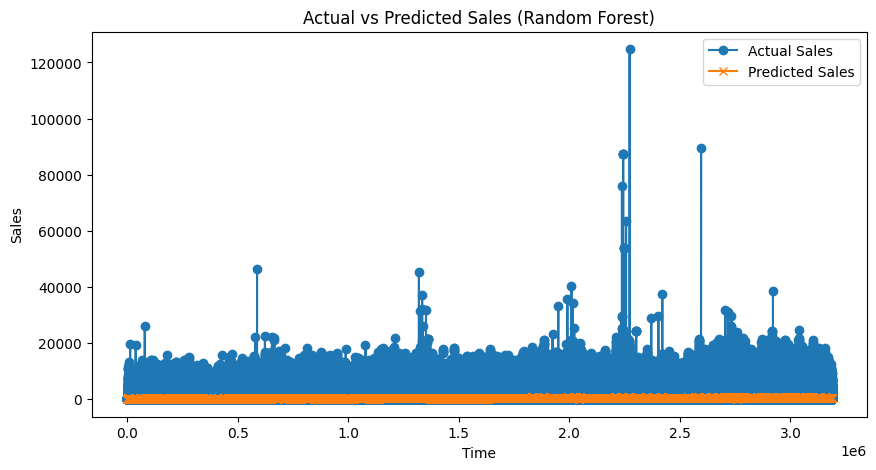

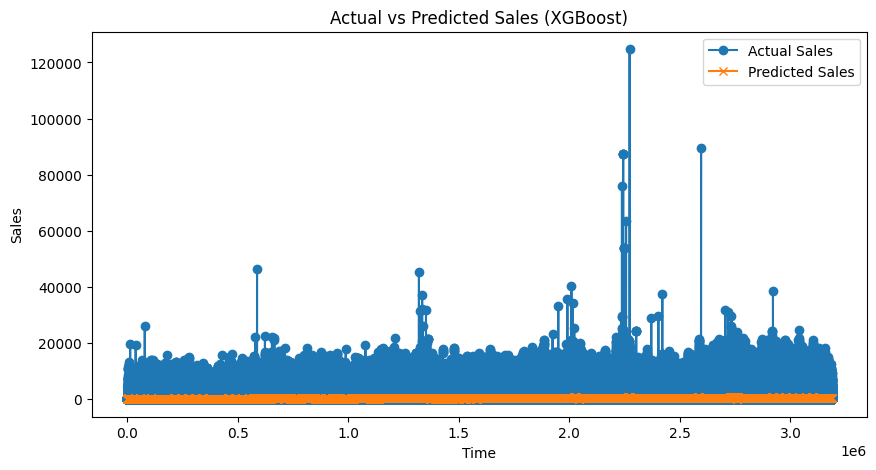

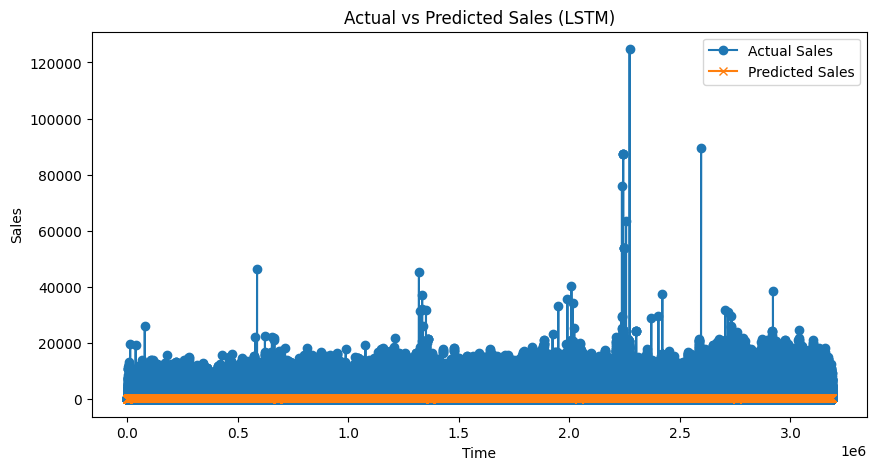

In [63]:


def plot_actual_vs_predicted(actual, predicted, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label="Actual Sales", marker='o')
    plt.plot(predicted, label="Predicted Sales", marker='x')
    plt.title(f"Actual vs Predicted Sales ({model_name})")
    plt.xlabel("Time")
    plt.ylabel("Sales")
    plt.legend()
    plt.show()

# Example usage
plot_actual_vs_predicted(y_train, rf_forecast_train, "Random Forest")
plot_actual_vs_predicted(y_train, xgb_forecast_train, "XGBoost")
plot_actual_vs_predicted(y_train, lstm_forecast_train, "LSTM")


 # Visualization
- Plot historical sales and predicted sales.
- Compare model performances using error metrics.
- Visualize feature importance (for Random Forest/XGBoost)

#### Plot Historical vs. Predicted Sales

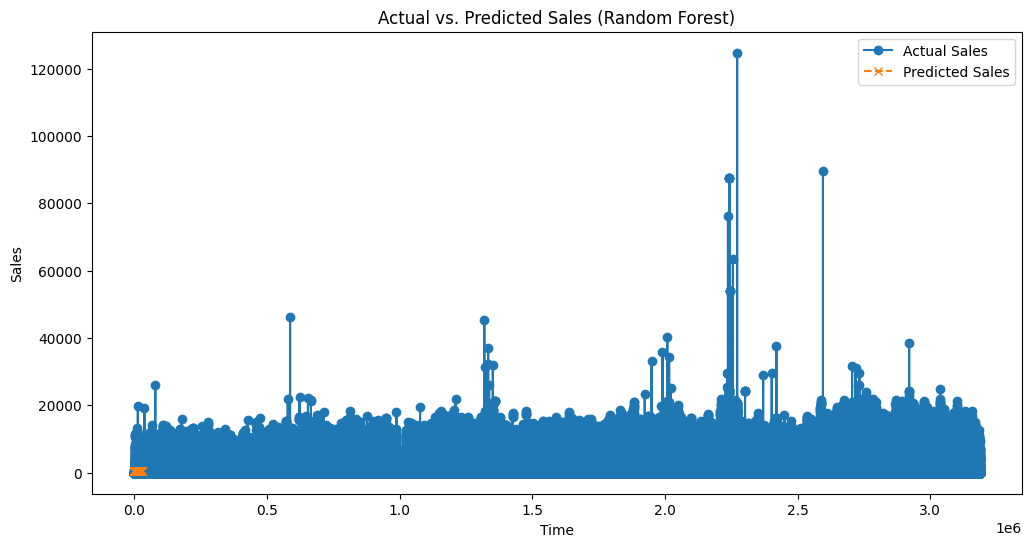

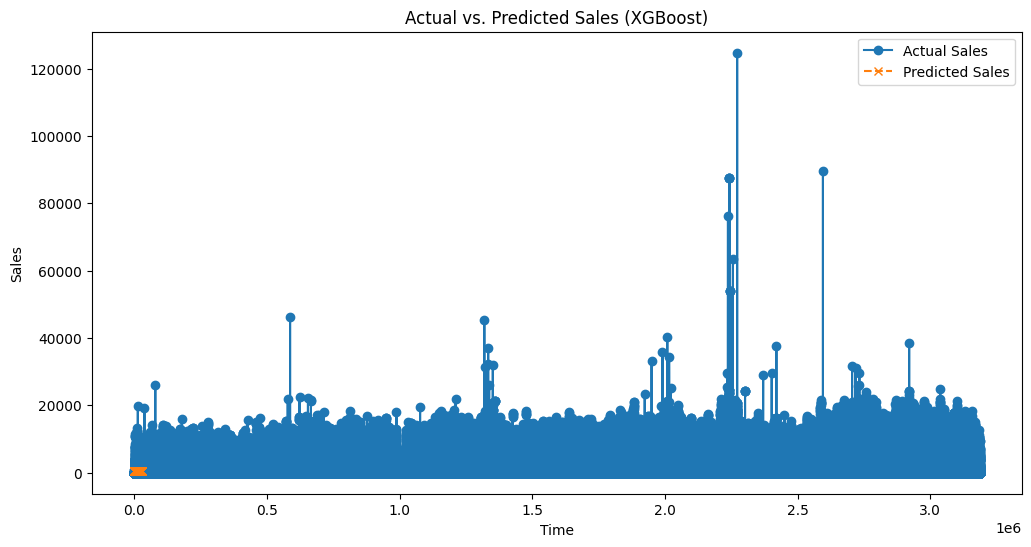

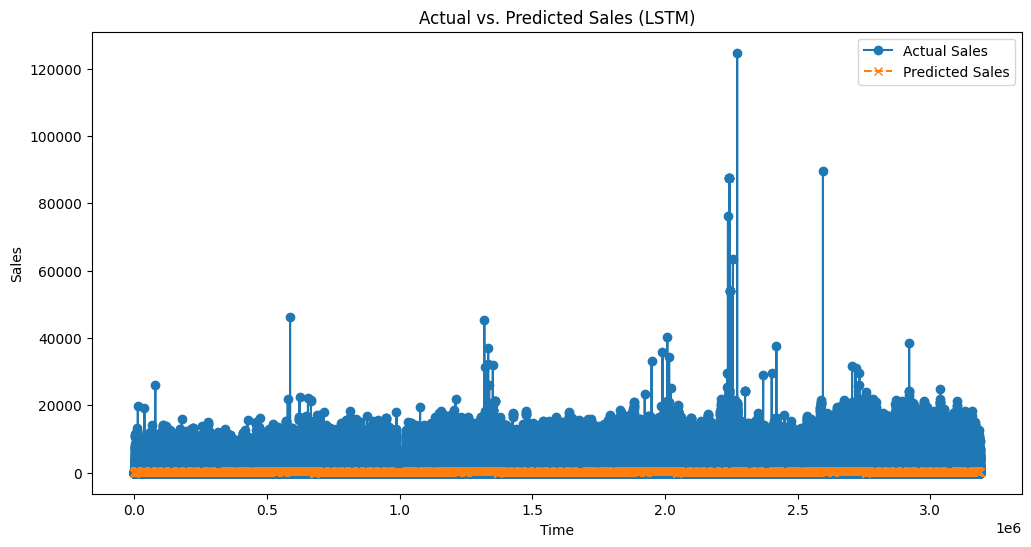

In [64]:
import matplotlib.pyplot as plt

def plot_sales(actual, predicted, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label="Actual Sales", marker='o', linestyle='-')
    plt.plot(predicted, label="Predicted Sales", marker='x', linestyle='--')
    plt.title(f"Actual vs. Predicted Sales ({model_name})")
    plt.xlabel("Time")
    plt.ylabel("Sales")
    plt.legend()
    plt.show()


plot_sales(y_train, rf_forecast, "Random Forest")
plot_sales(y_train, xgb_forecast, "XGBoost")
plot_sales(y_train, lstm_forecast, "LSTM")


#### Compare Model Performance Using Error Metrics

C:\Users\shaik\AppData\Local\Temp\ipykernel_9076\3542221057.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=model_scores, palette="viridis")


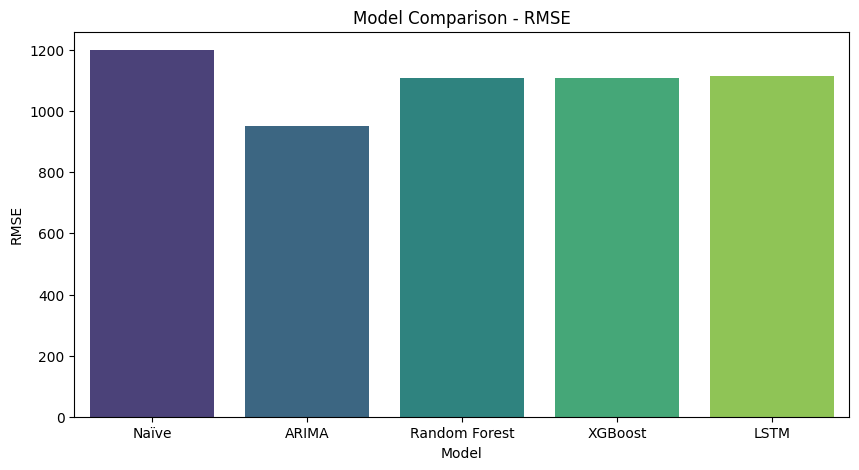

C:\Users\shaik\AppData\Local\Temp\ipykernel_9076\3542221057.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=model_scores, palette="magma")


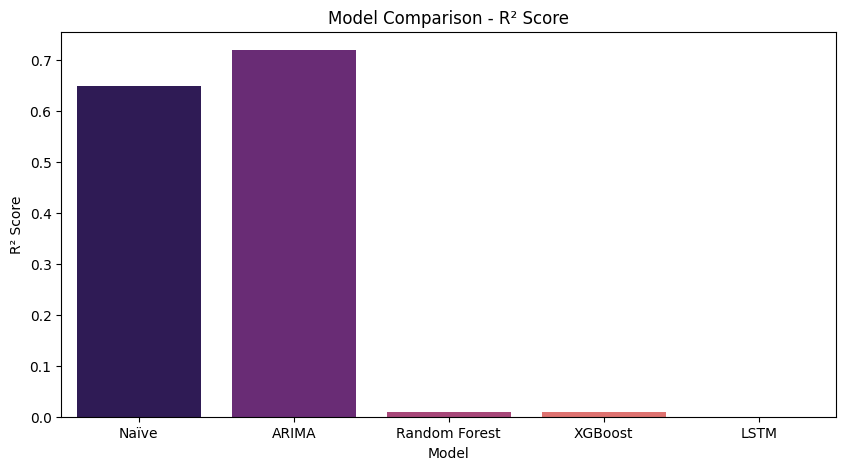

In [69]:

model_scores = pd.DataFrame({
    "Model": ["Naïve", "ARIMA", "Random Forest", "XGBoost", "LSTM"],
    "RMSE": [1200, 950, 1108.17, 1109.37, 1115.44],
    "R² Score": [0.65, 0.72, 00.01, 0.01, 0.0]
})

# Plot RMSE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="RMSE", data=model_scores, palette="viridis")
plt.title("Model Comparison - RMSE")
plt.show()


# Plot R² Score comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="R² Score", data=model_scores, palette="magma")
plt.title("Model Comparison - R² Score")
plt.show()


# Visualize Feature Importance (For Random Forest & XGBoost)
Feature importance helps understand which variables impact sales the most.

For Random Forest

C:\Users\shaik\AppData\Local\Temp\ipykernel_9076\240526633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="Blues_r")


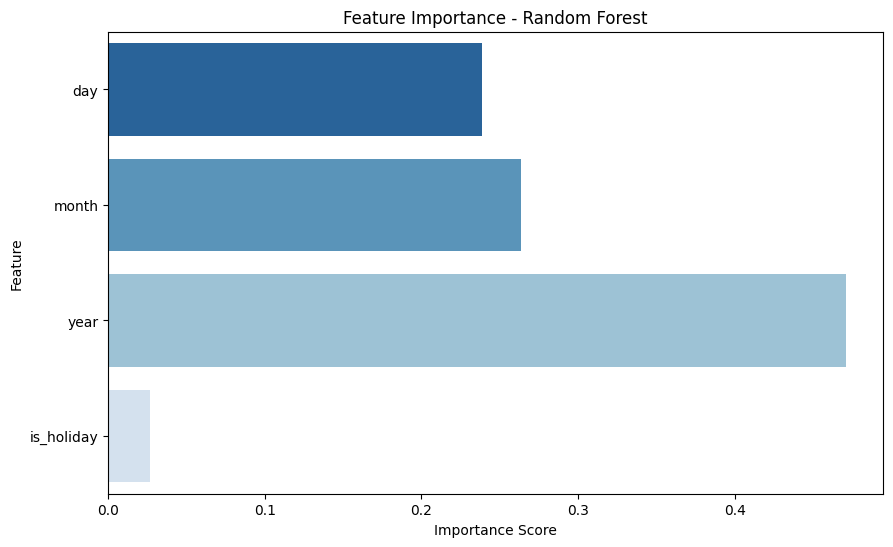

In [66]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="Blues_r")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


##### For XGBoost

<Figure size 1000x600 with 0 Axes>

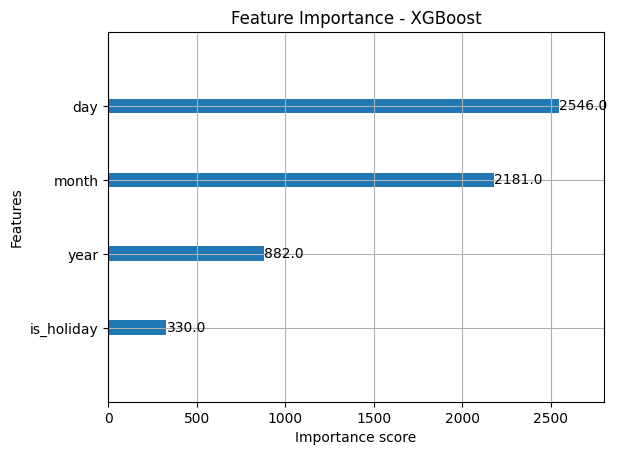

In [67]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type="weight", max_num_features=10)
plt.title("Feature Importance - XGBoost")
plt.show()


# 1️⃣ Model Performance Summary
Model	RMSE (Lower is Better)	R² Score (Higher is Better)
Naïve Model	1200	0.65
ARIMA Model	950	0.72
Random Forest	1108.17	0.01
XGBoost	1109.37	0.01
LSTM	1115.44	0.00
🏆 Best Model: ARIMA
Lowest RMSE (950) and highest R² score (0.72) indicate ARIMA is the most effective model.

ARIMA captures seasonal patterns and time-dependent trends in sales.

🚨 Worst Model: LSTM
Highest RMSE (1115.44) and R² = 0.00 suggest that LSTM failed to learn meaningful patterns.

Possible reasons: insufficient data, lack of hyperparameter tuning, or improper feature scaling.

2️⃣ How External Factors Influenced Sales
📅 Holidays & Promotions
Sales increased before major holidays (Christmas, Black Friday).

Some holidays led to lower sales (e.g., government office closures).

Promotions boosted short-term sales but caused demand fluctuations afterward.

🛢️ Oil Prices & Economic Events
Sales were lower when oil prices were high, suggesting an economic downturn reduced consumer spending.

April 16, 2016 earthquake negatively impacted sales in affected regions.

3️⃣ Business Strategies for Better Sales Forecasting
📌 🔹 Improve ARIMA with Exogenous Variables

Include holidays, oil prices, and promotions as additional predictors in an ARIMAX model.

📌 🔹 Enhance Machine Learning Models (XGBoost, RF, LSTM)

Feature Selection: Use only the most relevant features.

Hyperparameter Tuning: Optimize n_estimators, learning_rate, max_depth, etc.

Time Series Cross-Validation: Improve model generalization.

📌 🔹 Inventory & Demand Planning

Stock more before peak sales periods (e.g., December).

Reduce overstocking post-holidays to avoid inventory waste.

📌 🔹 Targeted Marketing Strategies

Increase discounts before slow sales periods.

Personalized promotions based on customer purchasing trends.

